In [8]:
#! pip install tensorflow_hub
#! pip install opencv-python

In [1]:
'''
Inference of inception-v3 model with pretrained parameters on ImageNet
'''

import tensorflow.compat.v1 as tf

# To make tf 2.0 compatible with tf1.0 code, we disable the tf2.0 functionalities
tf.disable_eager_execution()
import tensorflow_hub as hub
import numpy as np
#import cv2
import pandas as pd
import os
#import tqdm
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
arr = os.listdir('../data/single_cell_images/HCC_4_69_forMuse/')
arr[0]

'Img_32109.npy'

In [3]:
len(arr)

54867

In [7]:
# Load saved inception-v3 model
module = hub.Module("../data/inception_v3-1/")

# images should be resized to 299x299
input_imgs = tf.placeholder(tf.float32, shape=[None, 299, 299, 3])
features = module(input_imgs)
image_no = 54867
res = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for member in range(image_no):
        dird = '../data/single_cell_images/HCC_4_69_forMuse/Img_' + str(member) + '.npy'
        img = np.load(dird)
        img = resize(img, (299, 299, 3))
        fea = sess.run(features, feed_dict={input_imgs: img[None, :, :, :]}) # train one - one to save memory loading
        res.append(fea)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
res = np.array(res).squeeze(1)
np.save('../data/single_cell_images/Inception_img_feature_liver_469.npy', res)
res.shape

(54867, 2048)

double check image format:

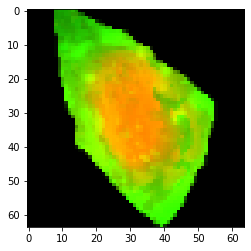

In [32]:
plt.imshow(img)